In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import numpy as np
from konlpy.tag import Okt
okt = Okt()

# 이부분은 PM님이
## 멤버들 매트릭스 전체 취합

In [3]:
result = pd.read_excel('전체_3D-CX.xlsx')
#result.set_index('Unnamed: 0', inplace=True)
result

,Clu-Actor-Action,Computed,Connected,Shared
0,C1-A1-A1,0.992737,0.995030,0.994306
1,C1-A1-A2,0.989810,0.994033,0.994063
2,C1-A1-A3,0.988855,0.993412,0.990893
3,C1-A1-A4,0.989947,0.993051,0.992769
4,C1-A1-A5,0.990836,0.992093,0.992889
...,...,...,...,...
58,C6-A2-A2,0.974604,0.974889,0.976321
59,C6-A2-A3,0.976133,0.976875,0.975973
60,C6-A2-A4,0.973094,0.974267,0.975527
61,C6-A2-A5,0.975794,0.976344,0.977462


In [86]:
result = result[result['Clu-Actor-Action'] != 'C1-A2-A4']

In [87]:
insight_0 = ['C1-A1-A4', 'C1-A1-A3', 'C1-A1-A1', 'C1-A1-A5', 'C2-A2-A2']
insight_1 = ['C1-A1-A6', 'C2-A1-A1', 'C4-A2-A2', 'C4-A2-A4', 'C4-A2-A5', 'C6-A2-A3', 'C6-A2-A4', 'C6-A2-A5', 'C6-A2-A6']
insight_2 = ['C3-A2-A7', 'C5-A1-A3', 'C3-A2-A8', 'C6-A2-A1', 'C3-A2-A5', 'C5-A3-A3']
insight_3 = ['C1-A3-A1', 'C1-A3-A4', 'C1-A3-A2', 'C1-A2-A2', 'C2-A2-A3', 'C5-A3-A1']
insight_4 = ['C5-A1-A2', 'C5-A2-A3', 'C5-A2-A5', 'C2-A1-A6', 'C2-A2-A2', 'C1-A1-A6', 'C5-A2-A4', 'C3-A2-A2', 'C1-A2-A3']
insight_5 = ['C5-A1-A1', 'C3-A2-A1', 'C1-A1-A2', 'C5-A3-A2']
insight_6 = ['C1-A3-A5', 'C3-A2-A6', 'C2-A2-A5', 'C4-A2-A3', 'C4-A2-A7', 'C3-A2-A3', 'C2-A2-A6']
insight_7 = ['C2-A2-A4', 'C5-A1-A5', 'C5-A1-A4', 'C2-A1-A4', 'C2-A2-A1', 'C5-A1-A2']
insight_8 = ['C2-A2-A3', 'C4-A2-A1', 'C2-A2-A5', 'C3-A2-A4', 'C5-A2-A1']
insight_9 = ['C4-A2-A6', 'C5-A1-A6', 'C1-A3-A4', 'C6-A2-A2', 'C1-A2-A1']
insight = [insight_0, insight_1, insight_2, insight_3, insight_4, insight_5, insight_6, insight_7, insight_8, insight_9]
insight

[['C1-A1-A4', 'C1-A1-A3', 'C1-A1-A1', 'C1-A1-A5', 'C2-A2-A2'],
 ['C1-A1-A6',
  'C2-A1-A1',
  'C4-A2-A2',
  'C4-A2-A4',
  'C4-A2-A5',
  'C6-A2-A3',
  'C6-A2-A4',
  'C6-A2-A5',
  'C6-A2-A6'],
 ['C3-A2-A7', 'C5-A1-A3', 'C3-A2-A8', 'C6-A2-A1', 'C3-A2-A5', 'C5-A3-A3'],
 ['C1-A3-A1', 'C1-A3-A4', 'C1-A3-A2', 'C1-A2-A2', 'C2-A2-A3', 'C5-A3-A1'],
 ['C5-A1-A2',
  'C5-A2-A3',
  'C5-A2-A5',
  'C2-A1-A6',
  'C2-A2-A2',
  'C1-A1-A6',
  'C5-A2-A4',
  'C3-A2-A2',
  'C1-A2-A3'],
 ['C5-A1-A1', 'C3-A2-A1', 'C1-A1-A2', 'C5-A3-A2'],
 ['C1-A3-A5',
  'C3-A2-A6',
  'C2-A2-A5',
  'C4-A2-A3',
  'C4-A2-A7',
  'C3-A2-A3',
  'C2-A2-A6'],
 ['C2-A2-A4', 'C5-A1-A5', 'C5-A1-A4', 'C2-A1-A4', 'C2-A2-A1', 'C5-A1-A2'],
 ['C2-A2-A3', 'C4-A2-A1', 'C2-A2-A5', 'C3-A2-A4', 'C5-A2-A1'],
 ['C4-A2-A6', 'C5-A1-A6', 'C1-A3-A4', 'C6-A2-A2', 'C1-A2-A1']]

In [88]:
insight_list = []
for i in result['Clu-Actor-Action']:
    for w, j in enumerate(insight):
        if i in j:
            insight_list.append(w)

In [89]:
result['insight'] = insight_list
result

,Clu-Actor-Action,Computed,Connected,Shared,insight
0,C1-A1-A1,0.992737,0.995030,0.994306,0
1,C1-A1-A2,0.989810,0.994033,0.994063,5
2,C1-A1-A3,0.988855,0.993412,0.990893,0
3,C1-A1-A4,0.989947,0.993051,0.992769,0
4,C1-A1-A5,0.990836,0.992093,0.992889,0
...,...,...,...,...,...
58,C6-A2-A2,0.974604,0.974889,0.976321,9
59,C6-A2-A3,0.976133,0.976875,0.975973,1
60,C6-A2-A4,0.973094,0.974267,0.975527,1
61,C6-A2-A5,0.975794,0.976344,0.977462,1


In [91]:
computed = result.groupby('insight')['Computed'].mean()
connected = result.groupby('insight')['Connected'].mean()
shared = result.groupby('insight')['Shared'].mean()

In [107]:
result = pd.DataFrame({'computed': computed, 'connected' : connected, 'shared':shared}).reset_index(drop=True)

## log scaler 적용 --> softmax 적용
- Log scaler는 비슷한 값에 차이를 주기 위해 적용 (x값이 0이면 -inf뜰 수 있음. 따라서 혹시나 -inf가 뜨는 경우 0.001로 replace해주세요)
- softmax는 0~1의 값을 주기 위해

In [96]:
c_=result[['computed','connected','shared']]

# 음수가 나와서 y 축값을 올리고 기울기 급하게 만들어서 더 차이가 부각되도록 변경
LOG=[]
for a in np.array(c_):
    A=np.log((a-1)**22)+6
    LOG.append(A**2)

result_=pd.DataFrame(LOG, columns=['computed','connected','shared'])
result_= result_.div(result_.sum(axis=1), axis=0)
result_

,computed,connected,shared
0,0.221610,0.380055,0.398335
1,0.303003,0.327960,0.369037
2,0.313647,0.329637,0.356716
3,0.333057,0.266948,0.399995
4,0.263358,0.325884,0.410758
5,0.338949,0.328568,0.332483
6,0.371747,0.283124,0.345129
7,0.212037,0.343390,0.444574
8,0.350896,0.281148,0.367957
9,0.359628,0.263657,0.376715


# 시각화

In [130]:
result_["idx"] = 'insight'+ (result.index + 1).astype(str)
result_ = result_.reset_index(drop = True)
result_ = result_[["idx", "computed", "connected", "shared"]]
result_

,idx,computed,connected,shared
0,insight1,0.221610,0.380055,0.398335
1,insight2,0.303003,0.327960,0.369037
2,insight3,0.313647,0.329637,0.356716
3,insight4,0.333057,0.266948,0.399995
4,insight5,0.263358,0.325884,0.410758
5,insight6,0.338949,0.328568,0.332483
6,insight7,0.371747,0.283124,0.345129
7,insight8,0.212037,0.343390,0.444574
8,insight9,0.350896,0.281148,0.367957
9,insight10,0.359628,0.263657,0.376715


In [131]:
result=result_.copy()

In [132]:
result

,idx,computed,connected,shared
0,insight1,0.221610,0.380055,0.398335
1,insight2,0.303003,0.327960,0.369037
2,insight3,0.313647,0.329637,0.356716
3,insight4,0.333057,0.266948,0.399995
4,insight5,0.263358,0.325884,0.410758
5,insight6,0.338949,0.328568,0.332483
6,insight7,0.371747,0.283124,0.345129
7,insight8,0.212037,0.343390,0.444574
8,insight9,0.350896,0.281148,0.367957
9,insight10,0.359628,0.263657,0.376715


In [120]:
import matplotlib.pyplot as plt
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='nanumGothic')
plt.rcParams["figure.figsize"] = (10, 10)

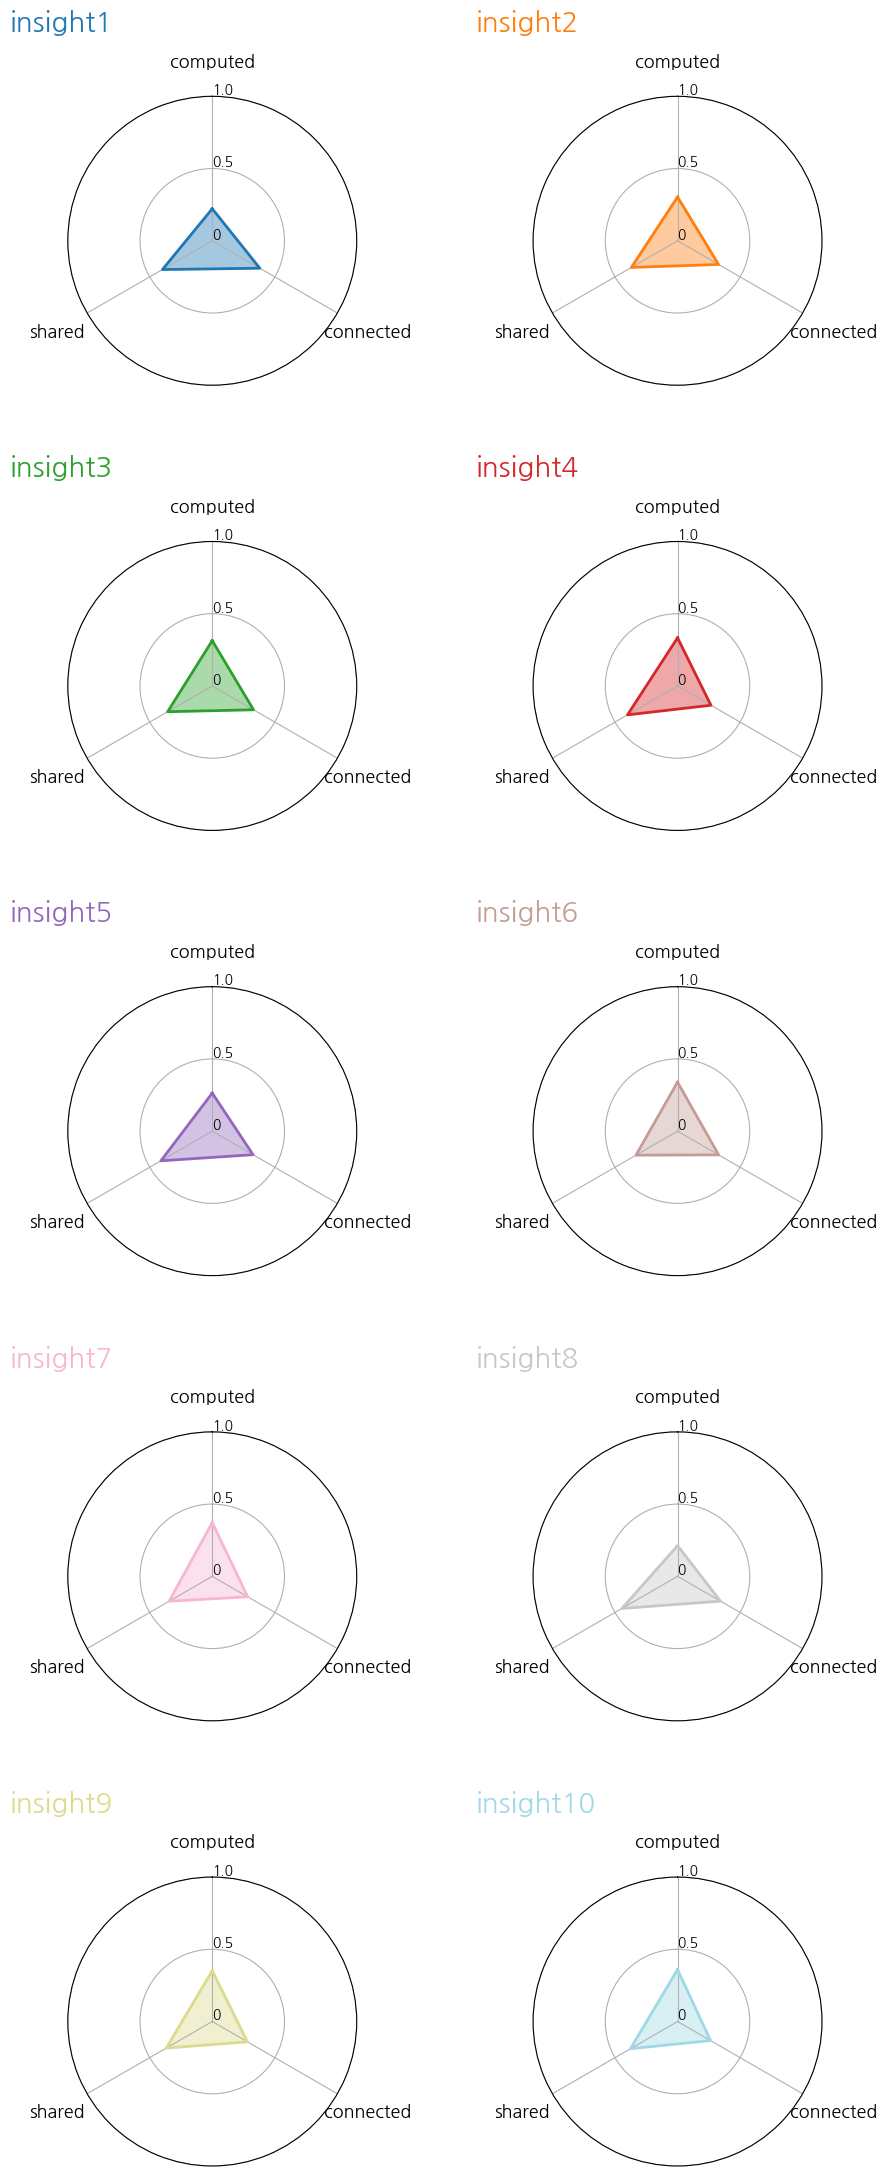

<Figure size 1000x1000 with 0 Axes>

In [139]:
## 따로 그리기
labels = result.columns[1:]
num_labels = len(labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가

my_palette = plt.cm.get_cmap("tab20", 10)

fig = plt.figure(figsize=(10,250))
fig.set_facecolor('white')

for i, row in result.iterrows():
    color = my_palette(i)
    data = result.iloc[i].drop('idx').tolist()
    data += data[:1]

    ax = plt.subplot(56,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향

    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.

    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0, 0.5, 1.0],['0','0.5','1.0'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,1.0)

    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.

    plt.title(row["idx"], size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.


plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()
plt.savefig('savefig_Log03.png')